<a href="https://colab.research.google.com/github/Pratikdate/ML_Model_Notes/blob/main/linear_regression_defth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import tensorflow as tf

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

//Hands on Machine learning book page 117

θ = ((X)
^T .X)
^−1
(X
^T
).y


• θ is the value of θ that minimizes the cost function.
• y is the vector of target values containing y
(1) to y
(m)
.
Let’s generate some linear-looking data to test this equation on (Figure 4-1):

Text(0, 0.5, 'y')

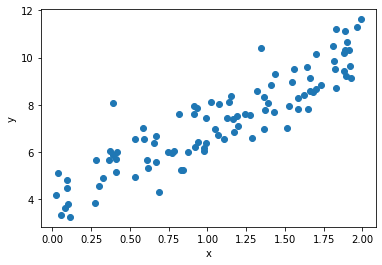

In [ ]:


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')

Now let’s compute θ using the Normal Equation. We will use the inv() function from
NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
the dot() method for matrix multiplication:

In [ ]:
%%time
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

CPU times: user 1.09 ms, sys: 997 µs, total: 2.09 ms
Wall time: 3.85 ms


In [ ]:
# theta_best is the best estimetter points

In [ ]:
theta_best

array([[4.29644662],
       [2.73587372]])

In [ ]:
X_new=np.array([[0],[2],[1]])

X_new_b = np.c_[np.ones((3, 1)), X_new] # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]
 [1. 1.]]


array([[4.29644662],
       [9.76819405],
       [7.03232034]])

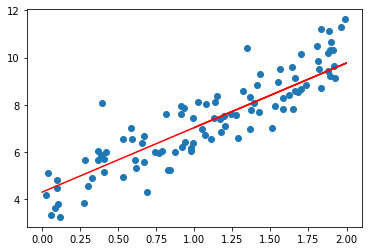

In [ ]:
plt.scatter(X,y)
plt.plot(X_new,y_predict,'-r')

In [ ]:


%%time
from sklearn.linear_model import LinearRegression


model=LinearRegression()
model.fit(X,y)

CPU times: user 3.72 ms, sys: 0 ns, total: 3.72 ms
Wall time: 16.9 ms


LinearRegression()

In [ ]:


#print(model.score(X_new_b,))
model.predict(X_new)

array([[ 3.9937534 ],
       [10.15760062],
       [ 7.07567701]])

Gradient Desent

n 4-7. Gradient Descent step

θ
next step
= θ − η∇θ MSE θ

Let’s look at a quick implementation of this algorithm:

array([[3.9937534 ],
       [3.08192361]])

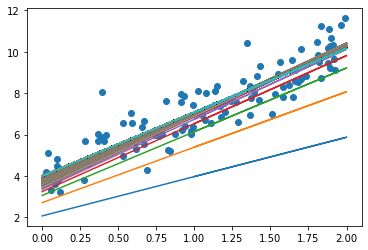

In [ ]:

eta = 0.1 # learning rate
n_iterations = 1000

m = 100
pre=[]
thi=[]
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):

 gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
 theta = theta - eta * gradients
 thi.append(theta)
 y_predict = X_new_b.dot(theta)
 pre.append(y_predict)

for i in range(n_iterations):
    plt.plot(X_new,pre[i])

#plt.plot(X_new,pre[2])
plt.scatter(X,y)

theta

In [ ]:
y_predict = X_new_b.dot(theta)
y_predict

array([[ 3.9937534 ],
       [10.15760062],
       [ 7.07567701]])

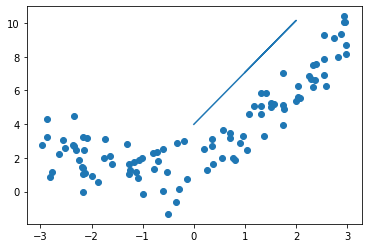

In [ ]:
plt.plot(X_new,y_predict)
plt.scatter(X,y)

Polynomial Regression curve

In [ ]:

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
print('new points x:',X_poly[0])
print('old points :',X[0])

new points x: [-0.51619942  0.26646184]
old points : [-0.51619942]


In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

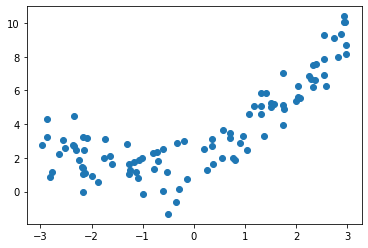

In [ ]:
plt.scatter(X,y)

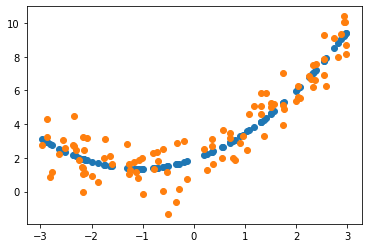

In [ ]:
pre=lin_reg.predict(X_poly)
plt.scatter(X,pre)
plt.scatter(X,y)

 high-degree Polynomial Regression model is severely overfitting the
training data, while the linear model is underfitting it.

In [ ]:

from sklearn.pipeline import Pipeline



polynomial_regression = Pipeline([
 ("poly_features", PolynomialFeatures(degree=20, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
#plot_learning_curves(polynomial_regression, X, y)

In [ ]:
polynomial_regression.fit(X,y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=20, include_bias=False)),
                ('lin_reg', LinearRegression())])

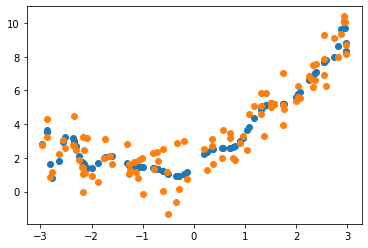

In [ ]:
pre=polynomial_regression.predict(X)
plt.scatter(X,pre)
plt.scatter(X,y)

Above model going to overfit becaiuse of high degree 20

In [ ]:

 from sklearn.linear_model import Lasso, Ridge,SGDRegressor



ridge_reg = Ridge(alpha=0.05,solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=0.05, solver='cholesky')

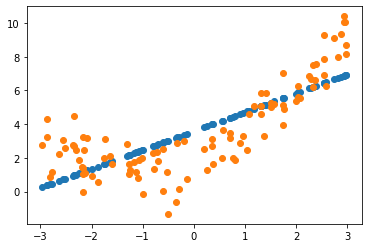

In [ ]:
pre_r=ridge_reg.predict(X)
plt.scatter(X,pre_r)
plt.scatter(X,y)

In [ ]:
ridge_reg.coef_

array([[1.11896461]])

In [ ]:

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

SGDRegressor()

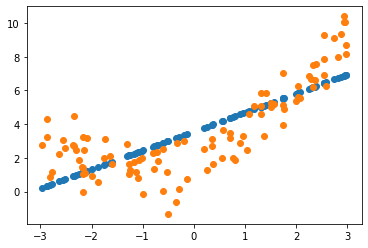

In [ ]:
pre=sgd_reg.predict(X)
plt.scatter(X,pre)
plt.scatter(X,y)

Lasso

In [ ]:
lasso_reg = Lasso(alpha=0)#solver="cholesky")
lasso_reg.fit(X, y)

<ipython-input-243-407ebf67d054>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e+02, tolerance: 7.085e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0)

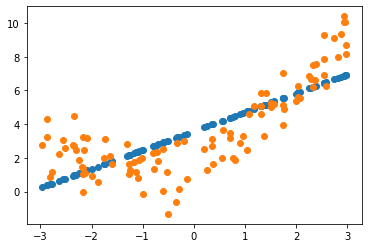

In [ ]:
pre=lasso_reg.predict(X)
plt.scatter(X,pre)
plt.scatter(X,y)